# HW 2: Supervised Learning Models
### Answer Guide created by Kate Moore, 2019
### Updated by Jie Chen, 2021

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 10

# Part 1: Regression on California Test Scores

## 1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html


In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.  

<AxesSubplot:>

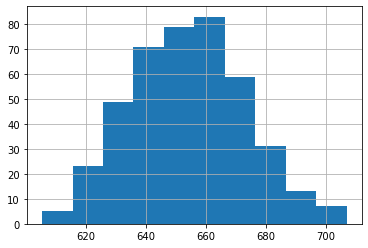

In [3]:
df['testscr'].hist()

<AxesSubplot:>

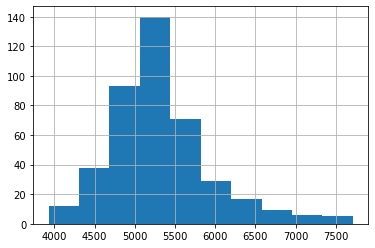

In [4]:
df['expnstu'].hist()

<AxesSubplot:>

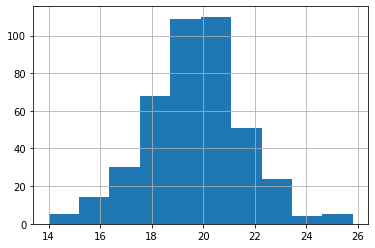

In [5]:
df['str'].hist()

<AxesSubplot:>

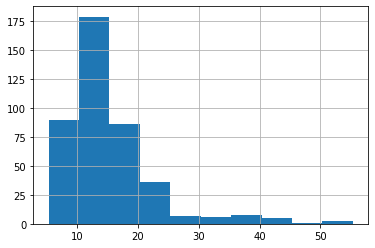

In [6]:
df['avginc'].hist()

## 1.2 Visualize the dependency of the target on each feature from 1.1.

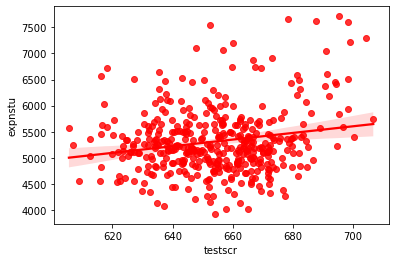

In [7]:
import seaborn as sns
x = sns.regplot(x="testscr", y="expnstu", data=df, color='r')

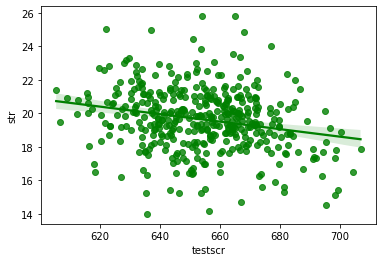

In [8]:
x = sns.regplot(x="testscr", y="str", data=df, color='g')

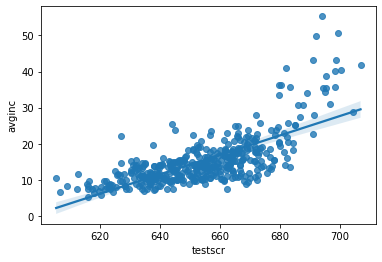

In [9]:
x = sns.regplot(x="testscr", y="avginc", data=df)

## 1.3a Split data in training and test set.

In [10]:
from sklearn.model_selection import train_test_split

corrected_data = df.drop(df.columns[[16, 17]], axis=1) # remove the reading and math scores from the dataset
data = corrected_data.iloc[:, 5:] # delete first six columns

y = data['testscr'] # assign outcome variable, i.e. what we want to predict
X = data.loc[:, data.columns != 'testscr'] # assign all other values as X-values, i.e. variables we use to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
# randomly assign some data to the test-set and the rest to the training-set

X.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


## 1.3b Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable.

### KNN for regression with cross-validation
Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor() # Play around with n_neighbors to determine best fit
knn.fit(X_train, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

# Training and Test Scores
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train)) # Will use later to compare results

KNN for REGRESSION (UNSCALED DATA)
Training set score: 0.303
Test set score: 0.085
Mean Cross-Validation, Kfold: -0.054


**Note:** KNN Regression with unscaled data is not accurate.

### Linear Regression (OLS) with cross-validation

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train) # Fit the training data to a regression line

print("LINEAR REGRESSION (UNSCALED DATA)")
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lr, X_train, y_train))))

OLS_unscaled = np.mean(cross_val_score(lr, X_train, y_train)) # Will use later to compare results

LINEAR REGRESSION (UNSCALED DATA)
Training set score: 0.805
Test set score: 0.807
Mean Cross-Validation, Kfold: 0.781


**Note:** Linear Regression with unscaled data has an avg. accuracy of 78%.

### Ridge with cross-validation

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # Fit the training data to a ridge regression line

print("RIDGE REGRESSION (UNSCALED DATA)") # Ridge is L2 penalty, which adds “squared magnitude” of coefficient as penalty term to the loss function. Good for avoiding the over-fitting issue
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(ridge, X_train, y_train))))

ridge_unscaled = np.mean(cross_val_score(ridge, X_train, y_train)) # Will use later to compare results

RIDGE REGRESSION (UNSCALED DATA)
Training set score: 0.805
Test set score: 0.807
Mean Cross-Validation, Kfold: 0.783


**Note:** Ridge Regression with unscaled data has an avg. accuracy of 78%.

### LASSO with cross-validation

In [14]:
# Lasso will give you ConvergenceWarning, ignore it
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # Fit the training data to a lasso regression line with alpha = 0.01 and 100,000 iterations

print("LASSO REGRESSION (UNSCALED DATA)") # LASSO is L1 penalty, which adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Good for feature selection when you have a lot of features.
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lasso, X_train, y_train))))

lasso_unscaled = np.mean(cross_val_score(lasso, X_train, y_train)) # Will use later to compare results

LASSO REGRESSION (UNSCALED DATA)
Training set score: 0.805
Test set score: 0.807
Mean Cross-Validation, Kfold: 0.787


**Note:** Lasso regression with unscaled data as the same avg. accuracy as Ridge, 78%.

## 1.3c Does scaling the data with the StandardScaler help?

In [15]:
from sklearn import preprocessing

# Here, I standardize by X data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaled KNN Regression

In [16]:
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train))

KNN for REGRESSION (SCALED DATA)
Training set score: 0.809
Test set score: 0.769
Mean Cross-Validation, Kfold: 0.711


**Note:** Avg. accuracy of KNN model improves greatly with scaled data.

In [17]:
print("KNN with unscaled data: {:.3f}".format(knn_unscaled))
print("KNN with scaled data  : {:.3f}".format(knn_scaled))

KNN with unscaled data: -0.054
KNN with scaled data  : 0.711


### Scaled Linear Regression (OLS)

In [18]:
lr = LinearRegression().fit(X_train_scaled, y_train)

print("LINEAR REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lr, X_train_scaled, y_train))))

OLS_scaled = np.mean(cross_val_score(lr, X_train_scaled, y_train))

LINEAR REGRESSION (SCALED DATA)
Training set score: 0.805
Test set score: 0.807
Mean Cross-Validation, Kfold: 0.781


**Note:** Avg. accuracy of linear regression model does not improve with scaled data.

In [19]:
print("Linear regression with unscaled data: {:.3f}".format(OLS_unscaled))
print("Linear regression with scaled data  : {:.3f}".format(OLS_scaled))

Linear regression with unscaled data: 0.781
Linear regression with scaled data  : 0.781


### Scaled Ridge Regression

In [20]:
ridge = Ridge().fit(X_train_scaled, y_train)

print("RIDGE REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(ridge, X_train_scaled, y_train))))

ridge_scaled = np.mean(cross_val_score(ridge, X_train_scaled, y_train))

RIDGE REGRESSION (SCALED DATA)
Training set score: 0.805
Test set score: 0.807
Mean Cross-Validation, Kfold: 0.783


**Note:** Avg. accuracy of ridge model does not improve with scaled data.

In [21]:
print("Ridge regression with unscaled data: {:.3f}".format(ridge_unscaled))
print("Ridge regression with scaled data  : {:.3f}".format(ridge_scaled))

Ridge regression with unscaled data: 0.783
Ridge regression with scaled data  : 0.783


### Scaled Lasso Regression

In [22]:
lasso = Lasso().fit(X_train_scaled, y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lasso, X_train_scaled, y_train))))

lasso_scaled = np.mean(cross_val_score(lasso, X_train_scaled, y_train))

LASSO REGRESSION (SCALED DATA)
Training set score: 0.797
Test set score: 0.786
Mean Cross-Validation, Kfold: 0.784


**Note:** Avg. accuracy of LASSO model does not improve with scaled data.

In [23]:
print("LASSO regression with unscaled data: {:.3f}".format(lasso_unscaled))
print("LASSO regression with scaled data  : {:.3f}".format(lasso_scaled))

LASSO regression with unscaled data: 0.787
LASSO regression with scaled data  : 0.784


**Answer:** 
Scalling improves training scores for KNN, but affords little change to the other methods.

## 1.4 Tune the parameters of the models where possible using GridSearchCV. 

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### GridsearchCV with KNN Regression

In [25]:
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

KNN for REGRESSION (SCALED DATA)
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.719
Test set Score: 0.782


**Note:** Best parameter for KNN is n_neighbors = 6

In [26]:
knn = KNeighborsRegressor(n_neighbors=6).fit(X_train_scaled, y_train)
print("KNN Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
best_knn = knn.score(X_test_scaled, y_test)

KNN Test set score: 0.782


### GridsearchCV with Linear Regression (OLS)

**Note:** There are no parameters to 'tune' with OLS.

### Gridsearch with Ridge Regression

In [27]:
ridge_param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid).fit(X_train_scaled, y_train)

print("RIDGE REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(ridge_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(ridge_grid.best_score_))
print("Test set Score: {:.3f}".format(ridge_grid.score(X_test_scaled, y_test)))

RIDGE REGRESSION (SCALED DATA)
Best Parameter: {'alpha': 10}
Best Cross-Validation Score: 0.786
Test set Score: 0.804


**Note:** Best parameter for ridge regression is alpha = 10

In [28]:
ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)
print("Ridge test set score: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
best_ridge = np.mean(cross_val_score(ridge, X_train_scaled, y_train))

Ridge test set score: 0.804


### Gridsearch with LASSO Regression

In [ ]:
lasso_param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_grid = GridSearchCV(Lasso(), lasso_param_grid).fit(X_train_scaled, y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(lasso_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(lasso_grid.best_score_))
print("Test set Score: {:.3f}".format(lasso_grid.score(X_test_scaled, y_test)))

LASSO REGRESSION (SCALED DATA)
Best Parameter: {'alpha': 0.1}
Best Cross-Validation Score: 0.785
Test set Score: 0.805


**Note:** Best parameter for lasso regression is alpha = 0.1

In [ ]:
lasso = Lasso(alpha=0.1).fit(X_train_scaled, y_train)
print("LASSO test set score: {:.3f}".format(lasso.score(X_test_scaled, y_test)))
best_lasso = np.mean(cross_val_score(lasso, X_train_scaled, y_train))

LASSO test set score: 0.805


## Do the results improve?

In [ ]:
print("KNN")
print("Before Gridsearch: {:.3f}".format(knn_scaled))
print("After Gridsearch: {:.3f}".format(best_knn))
print("")
print("RIDGE")
print("Before Gridsearch: {:.3f}".format(ridge_scaled))
print("After Gridsearch: {:.3f}".format(best_ridge))
print("")
print("LASSO")
print("Before Gridsearch: {:.3f}".format(lasso_scaled))
print("After Gridsearch: {:.3f}".format(best_lasso))

KNN
Before Gridsearch: 0.711
After Gridsearch: 0.782

RIDGE
Before Gridsearch: 0.783
After Gridsearch: 0.786

LASSO
Before Gridsearch: 0.784
After Gridsearch: 0.785


**Answer:** Yes. Tuning the parameters slightly improved each model, but KNN showed the only improvement that's really worthy of note.

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

**Note:** My two best linear models are Ridge (alpha=10) and LASSO (alpha = 0.1).

In [ ]:
d = {'LASSO': lasso.coef_, 'Ridge': ridge.coef_} # Builds a dictionary with the coefficients from my LASSO & Ridge models
coefficients = pd.DataFrame(data=d, index=X.columns) # Puts the dictionary into a dataframe along with variable names
coefficients

,LASSO,Ridge
enrltot,-0.000000,-0.296762
teachers,-0.000000,-0.347868
calwpct,-1.015310,-1.647477
mealpct,-9.931920,-8.810726
computer,0.000000,0.755095
compstu,0.019521,-0.037605
expnstu,1.074776,1.117175
str,-0.580477,-0.634427
avginc,3.697999,3.911891
elpct,-3.349810,-3.806197


**Answer:** LASSO restricts (or shrinks) the less influential features to zero (see evidence in the code below). In this case, my LASSO has converted features with coefficients approximately between 0.5 and -0.5 to zero. Still, LASSO and Ridge agree on which features are important. For example, both models agree that **'mealpct'** and **'elpct'** has a negative relationship with 'testscr', while **'avginc'** have a positive relationship with 'testscr'.

In [ ]:
print("Number of features used with LASSO: {}".format(np.sum(lasso.coef_ != 0)))
print("Number of features used with Ridge: {}".format(np.sum(ridge.coef_ != 0)))

Number of features used with LASSO: 7
Number of features used with Ridge: 10


## 1.6 Discuss which final model you would choose to predict new data

**Answer:** While each model has its advantages, I recommend RIDGE with alpha = 10.  It has a slightly higher cross validated accuracy than other models.

# Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/Links to an external site.

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

## Prepare data

In [ ]:
import pandas as pd

r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
w = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.

In [ ]:
red = r.assign(winetype=1)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
white = w.assign(winetype=0)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Combine both datasets into a single dataframe.
The target data (i.e. the dependent variable) is "winetype".

In [ ]:
mix = [white, red]
wines = pd.concat(mix)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

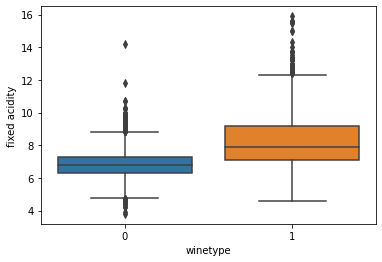

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='winetype', y='fixed acidity', data=wines)

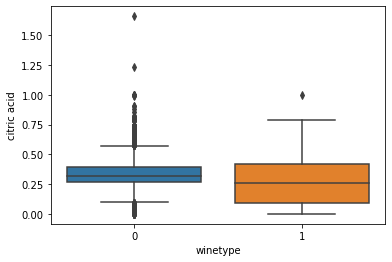

In [ ]:
sns.boxplot(x='winetype', y='citric acid', data=wines)

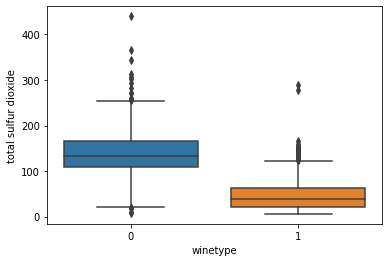

In [ ]:
sns.boxplot(x='winetype', y='total sulfur dioxide', data=wines)

## 2.2a Split data into training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

y = wines['winetype']
X = wines.loc[:, wines.columns != 'winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2.2b Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. 

### Logistic Regression using cross-validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(penalty = 'none').fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))

# Wine type prediction from test set (I'll use this later)
logreg_predicted_vals = logreg.predict(X_test)

# Organize the model coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Logistic Regression Coefficients'])
logreg_coef.head()

LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.980
Test set score: 0.977
Mean Cross Validation, KFold: 0.983


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.781301,13.38651,-2.873397,-0.169794,2.032668,0.073992,-0.078192,-2.528973,1.174202,10.639989,-0.92592,-0.030997


### L1-Penalized Logistic Regression using cross-validation

In [ ]:
pen_logreg_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train, y_train) # Default = L2, Penalty = L1

print("PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_l1.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l1, X_train, y_train))))

# Wine type prediction from test set (I'll use this later)
pen_logreg_predicted_vals_l1 = pen_logreg_l1.predict(X_test)

# Organize the model coefficients
pen_logreg_coef_l1 = pd.DataFrame(data=pen_logreg_l1.coef_, columns=X.columns, index=['Penalized Logistic Regression Coefficients - L1'])
pen_logreg_coef_l1.head()

PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)
Training set score: 0.988
Test set score: 0.985
Mean Cross Validation, KFold: 0.986


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Penalized Logistic Regression Coefficients - L1,0.919235,11.462589,0.0,-0.125121,15.215872,0.059326,-0.066636,-9.013786,4.827119,8.350849,-0.614992,-0.046947


### L2-Penalized Logistic Regression using cross-validation

In [ ]:
pen_logreg_l2 = LogisticRegression().fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION - L2 (UNSCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_l2.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_l2.score(X_test, y_test))) 

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l2, X_train, y_train))))

# Wine type prediction from test set (I'll use this later)
pen_logreg_predicted_vals_l2 = pen_logreg_l2.predict(X_test)

# Organize the model coefficients
pen_logreg_coef_l2 = pd.DataFrame(data=pen_logreg_l2.coef_, columns=X.columns, index=['Penalized Logistic Regression Coefficients - L2'])
pen_logreg_coef_l2.head()

PENALIZED LOGISTIC REGRESSION - L2 (UNSCALED DATA)
Training set score: 0.982
Test set score: 0.975
Mean Cross Validation, KFold: 0.978


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Penalized Logistic Regression Coefficients - L2,0.669844,8.316923,-1.881274,-0.15512,1.2459,0.052601,-0.065711,-1.344985,1.397932,6.50254,-0.7844,-0.102814


In [ ]:
# Print coefficients for comparison
c = [logreg_coef, pen_logreg_coef_l1, pen_logreg_coef_l2]
coefs = pd.concat(c)
coefs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.781301,13.386510,-2.873397,-0.169794,2.032668,0.073992,-0.078192,-2.528973,1.174202,10.639989,-0.925920,-0.030997
Penalized Logistic Regression Coefficients - L1,0.919235,11.462589,0.000000,-0.125121,15.215872,0.059326,-0.066636,-9.013786,4.827119,8.350849,-0.614992,-0.046947
Penalized Logistic Regression Coefficients - L2,0.669844,8.316923,-1.881274,-0.155120,1.245900,0.052601,-0.065711,-1.344985,1.397932,6.502540,-0.784400,-0.102814


### KNN Classifier using cross-validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Notice that I'm using a Classifier here (as opposed to the Regressor we used in PART 1)

knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

# Wine type prediction from test set (I'll use this later)
y_pred = knn.predict(X_test)

KNN CLASSIFER (UNSCALED DATA)
Training set score: 0.958
Test set score: 0.936
Mean Cross Validation, KFold: 0.942


**Note:** KNN classifier can not produce coefficients. So we don't include them here.

##2.2c How different are the results?

In [ ]:
# Organize predictions from each model into a dataframe
results = pd.DataFrame()
results = results.assign(N=logreg_predicted_vals)
results = results.assign(L2=pen_logreg_predicted_vals_l2)
results = results.assign(L1=pen_logreg_predicted_vals_l1)
results = results.assign(knn=y_pred)

# Count the combinations
results.groupby(['N', 'L1'])['knn'].count()

N  L1
0  0     1238
   1        6
1  0        8
   1      373
Name: knn, dtype: int64

**Note:** KNN shows the highest count where the Logistic Regression and the Penalized Logistic Regression models (L1) agree (0, 0, 1238) and (1, 1, 373).

In [ ]:
results.groupby(['N','knn'])['L1'].count()

N  knn
0  0      1205
   1        39
1  0        64
   1       317
Name: L1, dtype: int64

**Note:** Penalized Regressions shows the highest count where the Logistic Regression and the KNN models agree (0, 0, 1205) and (1, 1, 317). (Notice that Penlized Logistic Regression is less likely to agree with the combined predictions of KNN and Logistic Regression than KNN is to agree with the combined predictions of Logistic Regression and Penalized Regression).

In [ ]:
results.groupby(['knn','L1'])['N'].count()

knn  L1
0    0     1210
     1       59
1    0       36
     1      320
Name: N, dtype: int64

**Note:** Logistic Regressions shows the highest count where the KNN and Penalized Logistic Regression models agree (0, 0, 1210) and (1, 1, 320). (Notice that Logistic  Regression is also less likely to agree with the combined predictions of KNN and Penalized Logistic Regression than KNN is to agree with the combined predictions of Logistic Regression and Penalized Regression. This is a similar pattern noted in the previous cell).

In [ ]:
results.groupby(['N', 'L1', 'L2'])['knn'].count()

N  L1  L2
0  0   0     1236
       1        2
   1   0        5
       1        1
1  0   0        3
       1        5
   1   0        6
       1      367
Name: knn, dtype: int64

In [ ]:
print("Logistic Regression Mean Cross Validation: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))
print("L1-Penalized Logistic Regression Mean Cross Validation: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l1, X_train, y_train))))
print("L2-Penalized Logistic Regression Mean Cross Validation: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l2, X_train, y_train))))
print("KNN Classifier Mean Cross Validation: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

Logistic Regression Mean Cross Validation: 0.983
L1-Penalized Logistic Regression Mean Cross Validation: 0.985
L2-Penalized Logistic Regression Mean Cross Validation: 0.978
KNN Classifier Mean Cross Validation: 0.942


**Answer:** The regressions are more accurate than the nearest neighbor (Logisic Regression Accuracy = 0.983, Penalized Logistic Regression Accuracy = 0.985 & 0.978, KNN Accuracy = 0.942). This is most likely the result of their predicting slightly different results. Logistic Regression and Penalized Logistic Regression tend to make similar predictions - only disagreeing in about 10 instances - while the KNN Classifier model disagrees with the logistic model predictions by in about 50 instances.

##2.2d How does scaling the data with StandardScaler influence the results?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaled Logistic Regression using cross-validation

In [ ]:
logreg_scaled = LogisticRegression(penalty='none').fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled, X_train_scaled, y_train))))

# Organize the model coefficients
logreg_scaled_coef = pd.DataFrame(data=logreg_scaled.coef_, columns=X.columns, index=['Scaled Logistic Regression Coefficients'])

LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.994
Test set score: 0.993
Mean Cross Validation, KFold: 0.994


### Scaled Penalized Logistic Regression using cross-validation

In [ ]:
pen_logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_scaled_l1, X_train, y_train))))

# Organize the model coefficients
pen_logreg_scaled_coef_l1 = pd.DataFrame(data=pen_logreg_scaled_l1.coef_, columns=X.columns, index=['Scaled Penalized Logistic Regression Coefficients - L1'])

pen_logreg_scaled_l2 = LogisticRegression(penalty = 'l2').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_scaled_l2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_scaled_l2.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_scaled_l2, X_train, y_train))))

# Organize the model coefficients
pen_logreg_scaled_coef_l2 = pd.DataFrame(data=pen_logreg_scaled_l2.coef_, columns=X.columns, index=['Scaled Penalized Logistic Regression Coefficients - L2'])

# Print coefficients for comparison
c3 = [logreg_coef, pen_logreg_coef_l1, pen_logreg_coef_l2, logreg_scaled_coef, pen_logreg_scaled_coef_l1, pen_logreg_scaled_coef_l2]
coefs = pd.concat(c3)
coefs

PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Training set score: 0.994
Test set score: 0.993
Mean Cross Validation, KFold: 0.986
PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)
Training set score: 0.994
Test set score: 0.991
Mean Cross Validation, KFold: 0.978


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.781301,13.386510,-2.873397,-0.169794,2.032668,0.073992,-0.078192,-2.528973,1.174202,10.639989,-0.925920,-0.030997
Penalized Logistic Regression Coefficients - L1,0.919235,11.462589,0.000000,-0.125121,15.215872,0.059326,-0.066636,-9.013786,4.827119,8.350849,-0.614992,-0.046947
Penalized Logistic Regression Coefficients - L2,0.669844,8.316923,-1.881274,-0.155120,1.245900,0.052601,-0.065711,-1.344985,1.397932,6.502540,-0.784400,-0.102814
Scaled Logistic Regression Coefficients,-0.396933,1.155973,-0.464869,-5.603123,0.759642,1.435934,-3.336956,5.750060,-0.288440,0.437953,2.317036,0.186765
Scaled Penalized Logistic Regression Coefficients - L1,-0.033891,1.178414,-0.397744,-4.541071,0.742800,1.157368,-3.059747,4.668079,0.000000,0.484310,1.777803,0.167142
Scaled Penalized Logistic Regression Coefficients - L2,0.355438,1.280869,-0.359597,-3.521214,0.793006,0.928958,-2.918439,3.497433,0.320909,0.635613,1.204437,0.162930


### Scaled KNN using cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_scaled = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("Training set score: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN CLASSIFER (SCALED DATA)
Training set score: 0.995
Test set score: 0.991
Mean Cross Validation, KFold: 0.993


**Note:** KNN classifier can not produce coefficients. So we don't include them here.

In [ ]:
print("LOGISTIC REGRESSION")
print("Unscaled: {:.3f}".format(logreg.score(X_test, y_test)))
print("Scaled: {:.3f}".format(logreg_scaled.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION - L1")
print("Unscaled: {:.3f}".format(pen_logreg_l1.score(X_test, y_test)))
print("Scaled: {:.3f}".format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION - L2")
print("Unscaled: {:.3f}".format(pen_logreg_l2.score(X_test, y_test)))
print("Scaled: {:.3f}".format(pen_logreg_scaled_l2.score(X_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Unscaled: {:.3f}".format(knn.score(X_test, y_test)))
print("Scaled: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION
Unscaled: 0.977
Scaled: 0.993

PENALIZED LOGISTIC REGRESSION - L1
Unscaled: 0.985
Scaled: 0.993

PENALIZED LOGISTIC REGRESSION - L2
Unscaled: 0.975
Scaled: 0.991

KNN CLASSIFIER
Unscaled: 0.936
Scaled: 0.991


**Answer:** Scalling the data with StandardScaler improves the results for all models, particularly for KNN.

## 2.3a Tune the parameters where possible using GridSearchCV.

### GridsearchCV with Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(LogisticRegression(penalty='none'), logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION (SCALED DATA)
Best Parameter: {'C': 0.001}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


### GridsearchCV with L1-Penalized Logistic Regression

In [ ]:
pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l1.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l1.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l1.score(X_test_scaled, y_test)))

PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Best Parameter: {'C': 1}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


### GridsearchCV with L2-Penalized Logistic Regression

In [ ]:
pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l2 = GridSearchCV(LogisticRegression(), pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L2 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l2.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l2.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l2.score(X_test_scaled, y_test)))

PENLIZED LOGISTIC REGRESSION - L2 (SCALED DATA)
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


### GridsearchCV with KNN Classifier

In [ ]:
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

KNN for REGRESSION (SCALED DATA)
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


##2.3b Do the results improve?

In [ ]:
print("LOGISTIC REGRESSION")
print("Before Gridsearch: {:.6f}".format(logreg_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.6f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION - L1")
print("Before Gridsearch: {:.6f}".format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.6f}".format(pen_logreg_grid_l1.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION - L2")
print("Before Gridsearch: {:.6f}".format(pen_logreg_scaled_l2.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.6f}".format(pen_logreg_grid_l2.score(X_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Before Gridsearch: {:.6f}".format(knn_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.6f}".format(knn_grid.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION
Before Gridsearch: 0.993231
After Gridsearch: 0.993231

PENALIZED LOGISTIC REGRESSION - L1
Before Gridsearch: 0.992615
After Gridsearch: 0.992615

PENALIZED LOGISTIC REGRESSION - L2
Before Gridsearch: 0.991385
After Gridsearch: 0.992615

KNN CLASSIFIER
Before Gridsearch: 0.991385
After Gridsearch: 0.993231


**Answer:** Parameters recommended by Gridsearch make noticable improvements to the accuracy score for the KNN model, but new parameters recommended by Gridsearch do not a remarakable difference for the accuracy scores of the Logistic or Penalized Logistic Regression models.

## 2.4a Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Set up function parameters for different cross validation strategies
kfold = KFold(n_splits=5, shuffle=True)
skfold = StratifiedKFold(n_splits=5, shuffle=True) 

### Logistic Regression

In [ ]:
skfold = StratifiedKFold(shuffle=True)
logreg_param_grid = {'C': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid_skf = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid, cv = skfold)
logreg_grid_skf.fit(X_train_scaled, y_train)

print("Logistic Regression, GridSearchCV, stratified k-fold")
print("Best Parameter: {}".format(logreg_grid_skf.best_params_))
print("Best Cross-Validation Score: {:.6f}".format(logreg_grid_skf.best_score_))
print("Test set Score: {:.6f}".format(logreg_grid_skf.score(X_test_scaled, y_test)))

kfold = KFold(shuffle=True)
logreg_param_grid = {'C': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid_kf = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid, cv = kfold)
logreg_grid_kf.fit(X_train_scaled, y_train)

print("Logistic Regression, GridSearchCV, k-fold")
print("Best Parameter: {}".format(logreg_grid_kf.best_params_))
print("Best Cross-Validation Score: {:.6f}".format(logreg_grid_kf.best_score_))
print("Test set Score: {:.6f}".format(logreg_grid_kf.score(X_test_scaled, y_test)))

Logistic Regression, GridSearchCV, stratified k-fold
Best Parameter: {'C': 1e-07}
Best Cross-Validation Score: 0.994048
Test set Score: 0.993231
Logistic Regression, GridSearchCV, k-fold
Best Parameter: {'C': 1e-07}
Best Cross-Validation Score: 0.994458
Test set Score: 0.993231


The parameter C does not change. 

### Penalized Logistic Regression

In [ ]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear')
pen_logreg_param_grid = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = skfold)
pen_logreg_grid.fit(X_train_scaled, y_train)

print("Penalized Logistic Regression - L1, stratified k-fold")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))

logreg = LogisticRegression(penalty='l1', solver = 'liblinear')
pen_logreg_param_grid = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = kfold)
pen_logreg_grid.fit(X_train_scaled, y_train)

print("Penalized Logistic Regression - L1, k-fold")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))

Penalized Logistic Regression - L1, stratified k-fold
Best Parameter: {'C': 1}
Best Cross-Validation Score: 0.994
Test set Score: 0.993
Penalized Logistic Regression - L1, k-fold
Best Parameter: {'C': 1}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter C does not change. 

### KNN Classifier

In [ ]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn, knn_param_grid, cv = skfold).fit(X_train_scaled, y_train)

print("KNN for REGRESSION, stratified k-fold")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

knn_grid = GridSearchCV(knn, knn_param_grid, cv = kfold).fit(X_train_scaled, y_train)

print("KNN for REGRESSION, k-fold")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

KNN for REGRESSION, stratified k-fold
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.994
Test set Score: 0.993
KNN for REGRESSION, k-fold
Best Parameter: {'n_neighbors': 2}
Best Cross-Validation Score: 0.994
Test set Score: 0.991


The parameter n_neighbors changes. 

##2.4b Do they change if you change the random seed of the shuffling? 

### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

skfold_1 = StratifiedKFold(shuffle=True, random_state = 1)
skfold_42 = StratifiedKFold(shuffle=True, random_state = 42)

logreg_grid_skf = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid, cv = skfold_1)
logreg_grid_skf.fit(X_train_scaled, y_train)

print("Logistic Regression, GridSearchCV, stratified k-fold, random seed of shuffle 1")
print("Best Parameter: {}".format(logreg_grid_skf.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid_skf.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid_skf.score(X_test_scaled, y_test)))

logreg_grid_skf = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid, cv = skfold_42)
logreg_grid_skf.fit(X_train_scaled, y_train)

print("Logistic Regression, GridSearchCV, stratified k-fold, random seed of shuffle 42")
print("Best Parameter: {}".format(logreg_grid_skf.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid_skf.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid_skf.score(X_test_scaled, y_test)))

Logistic Regression, GridSearchCV, stratified k-fold, random seed of shuffle 1
Best Parameter: {'C': 1e-07}
Best Cross-Validation Score: 0.993
Test set Score: 0.993
Logistic Regression, GridSearchCV, stratified k-fold, random seed of shuffle 42
Best Parameter: {'C': 1e-07}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter C in Logistic Regression does not change

### Penalized Logistic Regression

In [ ]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear')
pen_logreg_param_grid = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}


pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = skfold_1)
pen_logreg_grid.fit(X_train_scaled, y_train)

print("Penalized Logistic Regression - L1, stratified k-fold, random seed of shuffle 1")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))

pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = skfold_42)
pen_logreg_grid.fit(X_train_scaled, y_train)

print("Penalized Logistic Regression - L1, stratified k-fold, random seed of shuffle 42")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))

Penalized Logistic Regression - L1, stratified k-fold, random seed of shuffle 1
Best Parameter: {'C': 0.1}
Best Cross-Validation Score: 0.994
Test set Score: 0.991
Penalized Logistic Regression - L1, stratified k-fold, random seed of shuffle 42
Best Parameter: {'C': 1}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter C in Penalized Logistic Regression will change when we change the random seed of the shuffling. 

### KNN Classifier

In [ ]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn, knn_param_grid, cv = skfold_1).fit(X_train_scaled, y_train)

print("KNN for REGRESSION, stratified k-fold, random seed of shuffle 1")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

knn_grid = GridSearchCV(knn, knn_param_grid, cv = skfold_42).fit(X_train_scaled, y_train)

print("KNN for REGRESSION, stratified k-fold, random seed of shuffle 42")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

KNN for REGRESSION, stratified k-fold, random seed of shuffle 1
Best Parameter: {'n_neighbors': 2}
Best Cross-Validation Score: 0.994
Test set Score: 0.991
KNN for REGRESSION, stratified k-fold, random seed of shuffle 42
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter n_neighbors will change when we change the random seed of the shuffling. 

##2.4c Or if you change the random state of the split into training and test data?

### Prepare data with different random states of the split

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state = 22)
scaler_1 = StandardScaler().fit(X_train_1)
X_train_scaled_1 = scaler_1.transform(X_train_1)
X_test_scaled_1 = scaler_1.transform(X_test_1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state = 42)
scaler_2 = StandardScaler().fit(X_train_2)
X_train_scaled_2 = scaler_2.transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)

### Logistic Regression

In [ ]:
logreg_param_grid = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid).fit(X_train_scaled_1, y_train_1)

print("LOGISTIC REGRESSION (SCALED DATA), random state of the split 22")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test_scaled_1, y_test_1)))

logreg_grid = GridSearchCV(LogisticRegression(penalty = 'none'), logreg_param_grid).fit(X_train_scaled_2, y_train_2)

print("LOGISTIC REGRESSION (SCALED DATA), random state of the split 42")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test_scaled_2, y_test_2)))


LOGISTIC REGRESSION (SCALED DATA), random state of the split 22
Best Parameter: {'C': 1e-06}
Best Cross-Validation Score: 0.993
Test set Score: 0.993
LOGISTIC REGRESSION (SCALED DATA), random state of the split 42
Best Parameter: {'C': 1e-06}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter C in Logistic Regression does not change. 

### L1-Penalized Logistic Regression

In [ ]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear')
pen_logreg_param_grid = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = skfold_42)
pen_logreg_grid.fit(X_train_scaled_1, y_train_1)

print("Penalized Logistic Regression - L1, stratified k-fold random state of shuffling 42, random state of the split 22")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled_1, y_test_1)))

pen_logreg_grid = GridSearchCV(logreg, pen_logreg_param_grid, cv = skfold_42)
pen_logreg_grid.fit(X_train_scaled_2, y_train_2)

print("Penalized Logistic Regression - L1, stratified k-fold random state of shuffling 42, random state of the split 42")
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid.score(X_test_scaled_2, y_test_2)))

Penalized Logistic Regression - L1, stratified k-fold random state of shuffling 42, random state of the split 22
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.994
Test set Score: 0.993
Penalized Logistic Regression - L1, stratified k-fold random state of shuffling 42, random state of the split 42
Best Parameter: {'C': 1}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter C in penalized logistic regression change from 10 to 1.

### KNN Classifier

In [ ]:
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled_1, y_train_1)

print("KNN for REGRESSION, random seed of splitting 22")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled_1, y_test_1)))

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled_2, y_train_2)

print("KNN for REGRESSION, random seed of splitting 42")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled_2, y_test_2)))

KNN for REGRESSION, random seed of splitting 22
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.994
Test set Score: 0.994
KNN for REGRESSION, random seed of splitting 42
Best Parameter: {'n_neighbors': 6}
Best Cross-Validation Score: 0.994
Test set Score: 0.993


The parameter n_neighbors does not change. 

## 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [ ]:
# This dataframe is built using the c3 object that was created earlier in the code
coefs = pd.concat(c3)
coefs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.781301,13.386510,-2.873397,-0.169794,2.032668,0.073992,-0.078192,-2.528973,1.174202,10.639989,-0.925920,-0.030997
Penalized Logistic Regression Coefficients - L1,0.919235,11.462589,0.000000,-0.125121,15.215872,0.059326,-0.066636,-9.013786,4.827119,8.350849,-0.614992,-0.046947
Penalized Logistic Regression Coefficients - L2,0.669844,8.316923,-1.881274,-0.155120,1.245900,0.052601,-0.065711,-1.344985,1.397932,6.502540,-0.784400,-0.102814
Scaled Logistic Regression Coefficients,-0.396933,1.155973,-0.464869,-5.603123,0.759642,1.435934,-3.336956,5.750060,-0.288440,0.437953,2.317036,0.186765
Scaled Penalized Logistic Regression Coefficients - L1,-0.033891,1.178414,-0.397744,-4.541071,0.742800,1.157368,-3.059747,4.668079,0.000000,0.484310,1.777803,0.167142
Scaled Penalized Logistic Regression Coefficients - L2,0.355438,1.280869,-0.359597,-3.521214,0.793006,0.928958,-2.918439,3.497433,0.320909,0.635613,1.204437,0.162930


**Answer:** I would use Penalized Logistic Regression (L2 penalty) with scaled data to predict new data.  It has the added benefit of highlighting important varaibles. (Though several models predicted cross validated data and test data equally well such that students could justify choosing other models)